,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


None

              userId        movieId  normalized_rating
count  100836.000000  100836.000000      100836.000000
mean      326.127564   19435.295718           0.667013
std       182.618491   35530.987199           0.231673
min         1.000000       1.000000           0.000000
25%       177.000000    1199.000000           0.555556
50%       325.000000    2991.000000           0.666667
75%       477.000000    8122.000000           0.777778
max       610.000000  193609.000000           1.000000


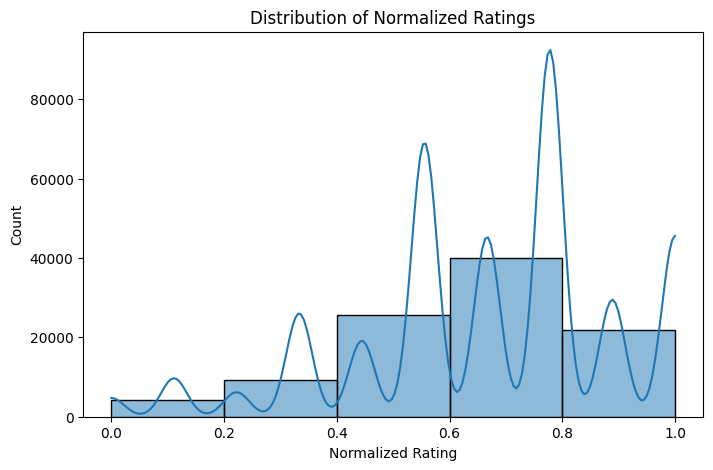

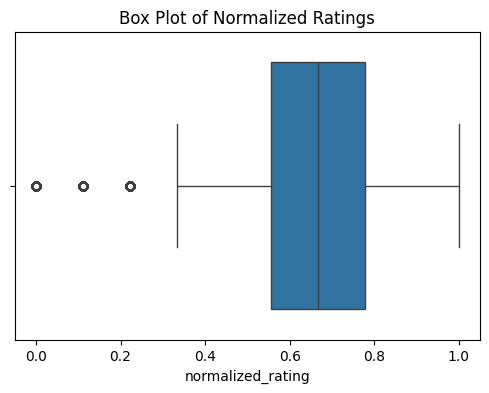

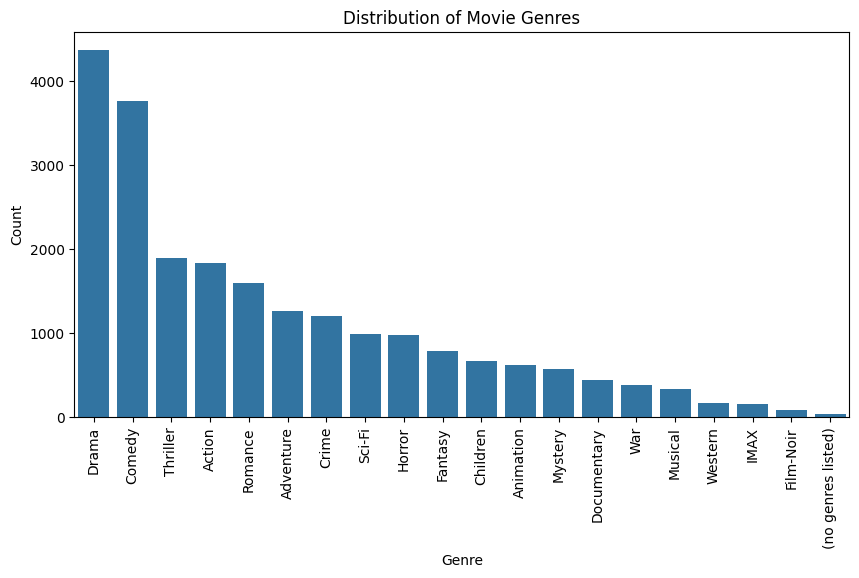

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load MovieLens 100K dataset
ratings_path = 'ratings.csv'
movies_path = 'movies.csv'
tags_path = 'tags.csv'
links_path = 'links.csv'

# Load datasets
df_ratings = pd.read_csv(ratings_path)
df_movies = pd.read_csv(movies_path)
df_tags = pd.read_csv(tags_path)
df_links = pd.read_csv(links_path)

# Display basic info
display(df_ratings.head())
display(df_movies.head())
display(df_tags.head())
display(df_links.head())

display(df_ratings.info())
display(df_movies.info())
display(df_tags.info())
display(df_links.info())

# Handle missing values
df_ratings.dropna(inplace=True)
df_movies.dropna(inplace=True)
df_tags.dropna(inplace=True)
df_links.dropna(inplace=True)

# Normalize rating values
scaler = MinMaxScaler()
df_ratings['normalized_rating'] = scaler.fit_transform(df_ratings[['rating']])

# Reduce dimensionality (optional, selecting key features only)
df_ratings = df_ratings[['userId', 'movieId', 'normalized_rating']]
df_movies = df_movies[['movieId', 'title', 'genres']]
df_tags = df_tags[['userId', 'movieId', 'tag']]

# Basic statistics
print(df_ratings.describe())

# Histogram of Ratings
plt.figure(figsize=(8,5))
sns.histplot(df_ratings['normalized_rating'], bins=5, kde=True)
plt.title("Distribution of Normalized Ratings")
plt.xlabel("Normalized Rating")
plt.ylabel("Count")
plt.show()

# Box Plot of Ratings
plt.figure(figsize=(6,4))
sns.boxplot(x=df_ratings['normalized_rating'])
plt.title("Box Plot of Normalized Ratings")
plt.show()

# Genre distribution visualization
plt.figure(figsize=(10,5))
genre_counts = df_movies['genres'].str.split('|').explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Clustering using K-means
X = df_ratings[['normalized_rating']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_ratings['kmeans_cluster'] = kmeans.fit_predict(X)

# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
df_ratings['dbscan_cluster'] = dbscan.fit_predict(X)

# Evaluate Clustering (Silhouette Score)
kmeans_silhouette = silhouette_score(X, df_ratings['kmeans_cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Visualization - KMeans Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.arange(len(X)), y=df_ratings['normalized_rating'], hue=df_ratings['kmeans_cluster'], palette='viridis')
plt.title("K-Means Clustering of Ratings")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Rating")
plt.show()

# Visualization - DBSCAN Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.arange(len(X)), y=df_ratings['normalized_rating'], hue=df_ratings['dbscan_cluster'], palette='coolwarm')
plt.title("DBSCAN Clustering of Ratings")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Rating")
plt.show()


KeyboardInterrupt: 

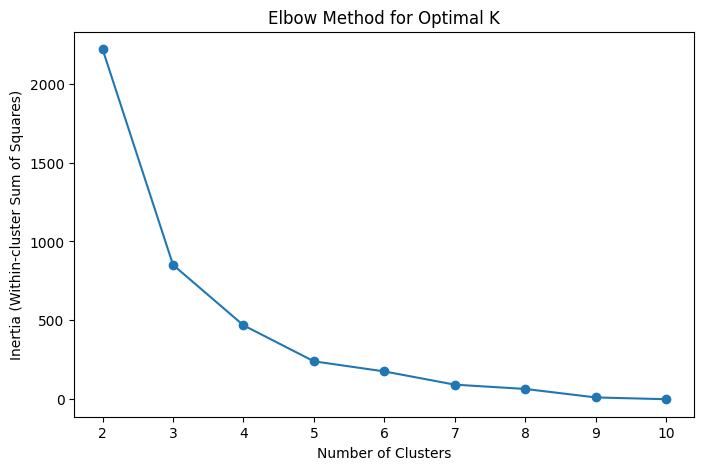

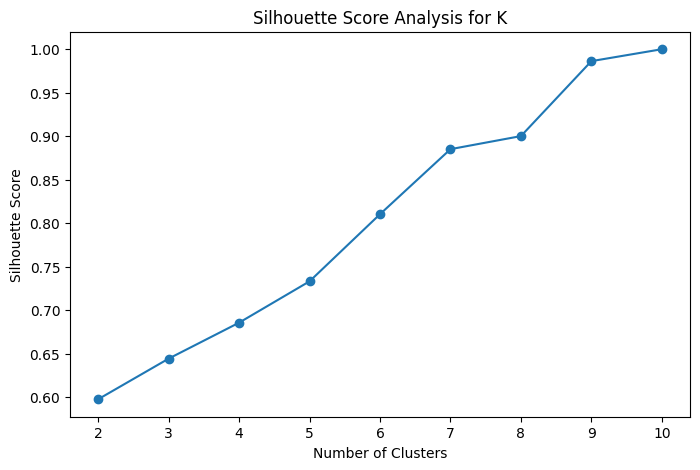

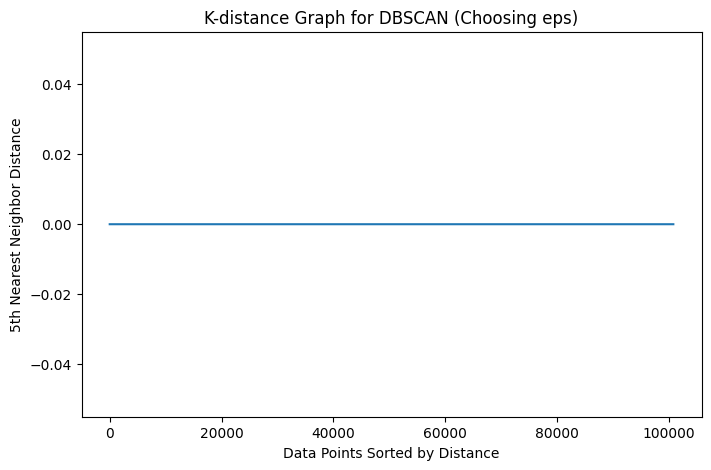

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ratings[['normalized_rating']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.show()

# Silhouette Score Analysis
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_ratings[['normalized_rating']])
    silhouette_scores.append(silhouette_score(df_ratings[['normalized_rating']], labels))

plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score Analysis for K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Apply K-means with the best K (choosing the best from analysis)
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_ratings['kmeans_cluster'] = kmeans.fit_predict(df_ratings[['normalized_rating']])

# Finding optimal eps for DBSCAN using Nearest Neighbor Distance Plot
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5)
nn.fit(df_ratings[['normalized_rating']])
distances, _ = nn.kneighbors(df_ratings[['normalized_rating']])

# Sort distances for visualization
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("K-distance Graph for DBSCAN (Choosing eps)")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

# Apply DBSCAN with a reasonable eps value (can be tuned further)
dbscan = DBSCAN(eps=0.1, min_samples=5)
df_ratings['dbscan_cluster'] = dbscan.fit_predict(df_ratings[['normalized_rating']])




K-Means Cluster Sizes:
kmeans_cluster
0    26818
2    20047
3    13211
5    13136
4     8551
6     7551
8     5550
7     2811
1     1791
9     1370
Name: count, dtype: int64

DBSCAN Cluster Sizes:
dbscan_cluster
0    26818
2    20047
1    13211
6    13136
5     8551
3     7551
7     5550
4     2811
9     1791
8     1370
Name: count, dtype: int64

Average Rating Per K-Means Cluster:
kmeans_cluster
0    0.777778
1    0.222222
2    0.555556
3    1.000000
4    0.888889
5    0.666667
6    0.333333
7    0.111111
8    0.444444
9    0.000000
Name: normalized_rating, dtype: float64

Average Rating Per DBSCAN Cluster:
dbscan_cluster
0    0.777778
1    1.000000
2    0.555556
3    0.333333
4    0.111111
5    0.888889
6    0.666667
7    0.444444
8    0.000000
9    0.222222
Name: normalized_rating, dtype: float64

Silhouette Score for K-Means: 1.0
Silhouette Score for DBSCAN: 1.0

Top Genres Per K-Means Cluster:
kmeans_cluster           
0               Drama        12360
                Comedy     

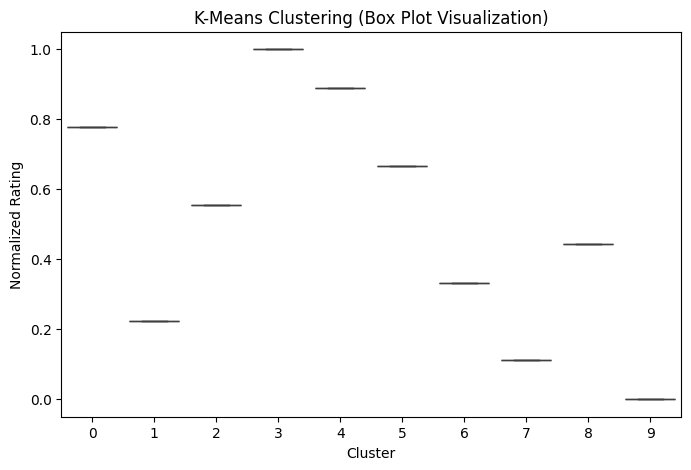

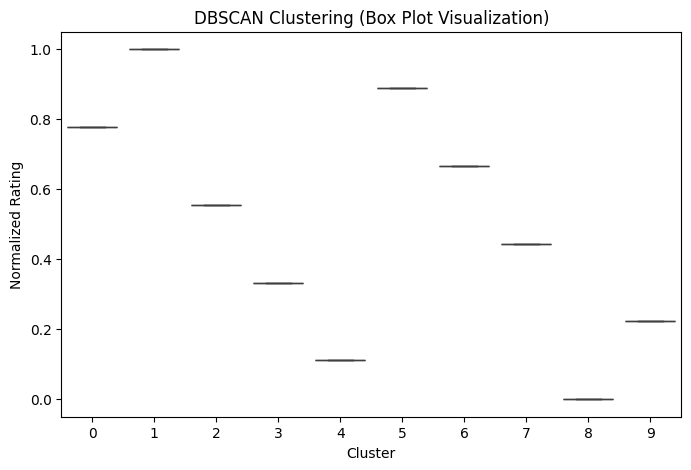

In [ ]:
# Compare Cluster Sizes
print("K-Means Cluster Sizes:")
print(df_ratings['kmeans_cluster'].value_counts())
print("\nDBSCAN Cluster Sizes:")
print(df_ratings['dbscan_cluster'].value_counts())

# Compare Average Ratings per Cluster
print("\nAverage Rating Per K-Means Cluster:")
print(df_ratings.groupby('kmeans_cluster')['normalized_rating'].mean())
print("\nAverage Rating Per DBSCAN Cluster:")
print(df_ratings.groupby('dbscan_cluster')['normalized_rating'].mean())

# Compare Silhouette Scores
kmeans_silhouette = silhouette_score(df_ratings[['normalized_rating']], df_ratings['kmeans_cluster'])
dbscan_silhouette = silhouette_score(df_ratings[['normalized_rating']], df_ratings['dbscan_cluster'])
print(f"\nSilhouette Score for K-Means: {kmeans_silhouette}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

# Merge Ratings with Movie Data to Analyze Genre Influence
df_merged = df_ratings.merge(df_movies, on='movieId', how='left')

genre_counts_per_cluster = df_merged.groupby('kmeans_cluster')['genres'].apply(lambda x: x.str.split('|').explode().value_counts().head(5))
print("\nTop Genres Per K-Means Cluster:")
print(genre_counts_per_cluster)

# Box Plot Visualization
plt.figure(figsize=(8,5))
sns.boxplot(x=df_ratings['kmeans_cluster'], y=df_ratings['normalized_rating'])
plt.title("K-Means Clustering (Box Plot Visualization)")
plt.xlabel("Cluster")
plt.ylabel("Normalized Rating")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_ratings['dbscan_cluster'], y=df_ratings['normalized_rating'])
plt.title("DBSCAN Clustering (Box Plot Visualization)")
plt.xlabel("Cluster")
plt.ylabel("Normalized Rating")
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Merge ratings with movies
df = df_ratings.merge(df_movies, on='movieId', how='left')

# Define classification labels: Good (rating >= 3.5), Bad (rating < 3.5)
df['label'] = (df['rating'] >= 3.5).astype(int)

# Encode categorical features (User ID and Movie ID)
user_encoder = LabelEncoder()
df['userId'] = user_encoder.fit_transform(df['userId'])

movie_encoder = LabelEncoder()
df['movieId'] = movie_encoder.fit_transform(df['movieId'])

# One-hot encode genres
genres_encoded = df['genres'].str.get_dummies('|')
df = pd.concat([df, genres_encoded], axis=1)
df.drop(columns=['genres'], inplace=True)

# Select features and labels
X = df.drop(columns=['rating', 'label', 'timestamp', 'title'])
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LS-SVM Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Train Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Models
svm_preds = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]
nn_probs = nn_model.predict(X_test)
nn_preds = (nn_probs > 0.5).astype(int)

# Performance Metrics
print("LS-SVM Classification Report:\n", classification_report(y_test, svm_preds))
print("Neural Network Classification Report:\n", classification_report(y_test, nn_preds))

print("LS-SVM ROC-AUC:", roc_auc_score(y_test, svm_probs))
print("Neural Network ROC-AUC:", roc_auc_score(y_test, nn_probs))

# Confusion Matrices
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Blues')
plt.title("LS-SVM Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, nn_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("Neural Network Confusion Matrix")
plt.show()


ModuleNotFoundError: No module named 'tensorflow'